- ## Section 1 : Introduction

Dans ce TP nous utilisons deux versions de perceptron (version online et version batch) pour l'entrainements et le tests de ces perceptrons sur différentes variations de données, et d'afficher les résultats de ces tests.

- ## Section 2 : Importation des bibliothèques


In [3]:
import numpy as np
import matplotlib.pyplot as plt

- ## Section 3 : Définition des fonctions


In [4]:
def plot_perceptron(points, labels, weights1,weights2):
    
    
    points = np.array(points)
    labels = np.array(labels)
    
    
    class_0 = points[labels == 0]
    class_1 = points[labels == 1]

    
    plt.scatter(class_0[:, 0], class_0[:, 1], color='red', label='Class 0')
    plt.scatter(class_1[:, 0], class_1[:, 1], color='blue', label='Class 1')
    
    
    
    x_values = np.array([points[:, 0].min(), points[:, 0].max()])
    y_values = -(weights1[0] + weights1[1] * x_values) / weights1[2]
    
    
    x_values2 = np.array([points[:, 0].min(), points[:, 0].max()])
    y_values2 = -(weights2[0] + weights2[1] * x_values) / weights2[2]

    
    
    
    
    plt.plot(x_values, y_values, color='black', label='Batch')
    plt.plot(x_values2, y_values2, color='green', label='Online')
    
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Perceptron')
    plt.legend()
    plt.grid(True)
    plt.show()

In [5]:
def perceptron_online(points, labels, weights, alpha, epochs=1000):
    points = np.array(points)
    labels = np.array(labels)
    weights = np.array(weights)
    points = np.insert(points, 0, 1, axis=1)  
    iterations = 0
    for epoch in range(epochs):
        all_correctly_classified = True
        indices = np.arange(len(points))
        np.random.shuffle(indices)
        for i in indices:
            x = points[i]
            t = labels[i]
            y = 1 if np.dot(weights.T, x) > 0 else 0
            if y != t:
                all_correctly_classified = False 
                weights += alpha * (t - y) * x

        iterations += 1
        if all_correctly_classified:
            break
    return weights.tolist(), iterations

In [6]:
def perceptron_batch(points, labels, weights, alpha):
    
    
    points = np.array(points)
    labels = np.array(labels)
    weights = np.array(weights)
    iterations = 0
    points = np.insert(points, 0, 1, axis=1)
    
    while True:
        delta_w = np.zeros_like(weights)
        all_correctly_classified = True

        for x, t in zip(points, labels):
            
            y = 1 if np.dot(weights.T, x) > 0 else 0
            
            
            if y != t:
                all_correctly_classified = False
                delta_w += alpha * (t - y) * x
        
        
        weights += delta_w
        iterations += 1        

        
        if all_correctly_classified:
            break
    return weights.tolist(),iterations


In [7]:
def generate_ls_data(N, dim, weights_teacher):
    
    
    points = np.random.uniform(-100, 100, (N, dim))
    
    
    points_with_bias = np.insert(points, 0, 1, axis=1)
    
    
    labels = np.where(np.dot(points_with_bias, weights_teacher) > 0, 1, 0)
    
    return points, labels


In [8]:
def calculer_R(weights_teacher, weights_student):
    
    weights_teacher = np.array(weights_teacher)
    weights_student = np.array(weights_student)
    
    dot_product = np.dot(weights_teacher, weights_student)
    
    norm_teacher = np.linalg.norm(weights_teacher)
    norm_student = np.linalg.norm(weights_student)
    
    cosine_angle = dot_product / (norm_teacher * norm_student)
    
    return cosine_angle

In [9]:
def run_tests(dimensions, points, etas, perceptron_function):
    results = np.zeros((len(dimensions), len(points), len(etas), 2))  # 2 pour <IT> et <R>
    
    for i, N in enumerate(dimensions):
        for j, P in enumerate(points):
            for k, eta in enumerate(etas):
                print(f'Running tests for N={N}, P={P}, and eta={eta}...')                
                iterations = []
                overlaps = []
                for _ in range(50):
                    weights_teacher = np.random.randn(N + 1)
                    points_T, labels_T = generate_ls_data(P, N, weights_teacher)
                    initial_weights_student = np.random.randn(N + 1)

                    final_weights, it = perceptron_function(points_T, labels_T, initial_weights_student, eta)
                    overlap = calculer_R(weights_teacher, final_weights)
                    
                    iterations.append(it)
                    overlaps.append(overlap)
                
                results[i, j, k, 0] = np.mean(iterations)
                results[i, j, k, 1] = np.mean(overlaps)
    
    return results


In [10]:

def format_results(N_values, P_values, eta_values, results_batch, results_online):
    for eta_index, eta in enumerate(eta_values):
        print(f'eta={eta}')
        print('+--------+' + '+------------------' * len(P_values) + '+')
        print('|   N\P   | ' + ' | '.join(f'{P:>16}' for P in P_values) + ' |')
        print('+--------+' + '+------------------' * len(P_values) + '+')
        for N_index, N in enumerate(N_values):
            batch_results = ' | '.join(
                f'<{results_batch[N_index, j, eta_index, 0]:.2f};{results_batch[N_index, j, eta_index, 1]:.2f}>'
                for j, P in enumerate(P_values)
            )
            online_results = ' | '.join(
                f'<{results_online[N_index, j, eta_index, 0]:.2f};{results_online[N_index, j, eta_index, 1]:.2f}>'
                for j, P in enumerate(P_values)
            )
            print(f'| {N:<6} | {batch_results} |')
            print('+--------+' + '+------------------' * len(P_values) + '+')
            print(f'| {N:<6} | {online_results} |')
            print('+--------+' + '+------------------' * len(P_values) + '+')
        print('\n')

- ## Section 4 : Exemple d'entraînement et de visualisation


Exemple d'application des perceptrons sur des données de la fonction ET, OU, et l'exemple vu au cours


[-0.8500000000000001, 0.7, 0.75]
[-0.8500000000000001, 0.24999999999999994, 0.75]


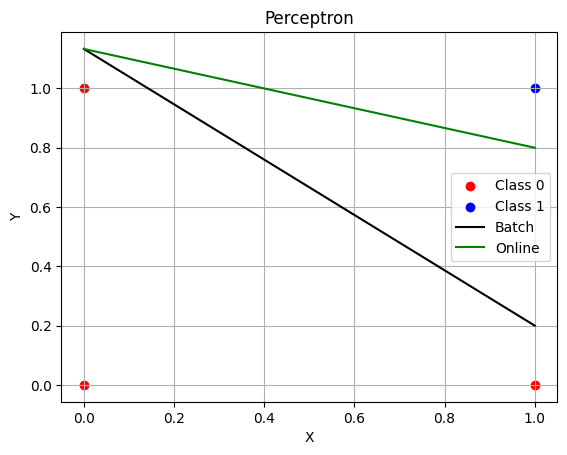

[-0.4, 0.7, 0.75]
[-0.4, 0.7, 0.75]


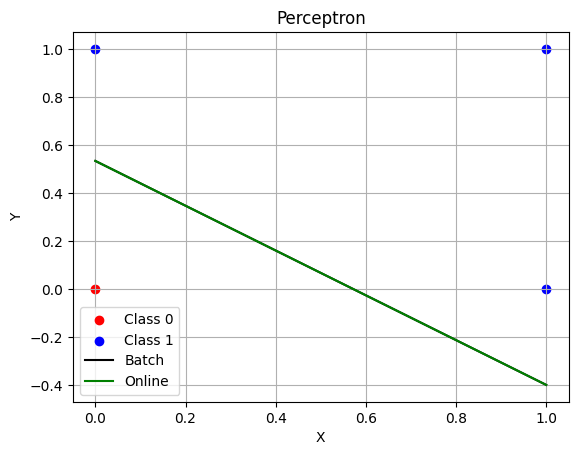

[0.04999999999999999, 0.7, -0.6000000000000001]
[0.5, 2.2, -0.44999999999999996]


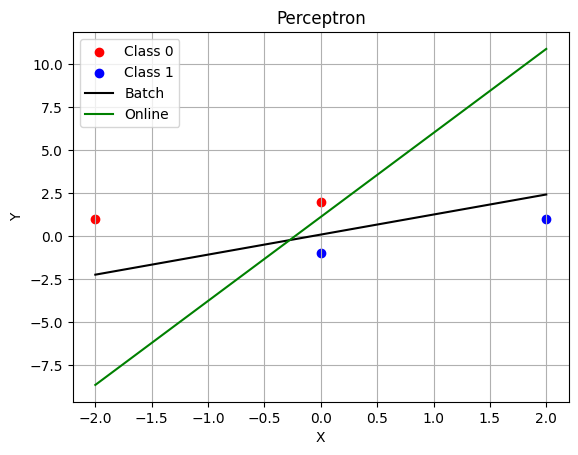

In [11]:

points_example = [(0, 0), (0, 1), (1, 0), (1, 1)]
labels_example = [0, 0, 0, 1]
initial_weights = [0.5, 0.7, 0.3]  # w0, w1, w2
learning_rate = 0.45

final_weights1,iter=perceptron_batch(points_example, labels_example, initial_weights, learning_rate)
print(final_weights1)

final_weights2,iter=perceptron_online(points_example, labels_example, initial_weights,learning_rate)
print(final_weights2)
plot_perceptron( points_example, labels_example, final_weights1,final_weights2)


# "ou" exemple
points_example = [(0, 0), (0, 1), (1, 0), (1, 1)]
labels_example = [0, 1, 1, 1]

final_weights1,iter=perceptron_batch(points_example, labels_example, initial_weights, learning_rate)
print(final_weights1)

final_weights2,iter=perceptron_online(points_example, labels_example, initial_weights, learning_rate)
print(final_weights2)
plot_perceptron( points_example, labels_example, final_weights1,final_weights2)


points_cls = [(2, 1), (0, -1), (-2, 1), (0, 2)]
labels_cls = [1, 1, 0, 0]

final_weights1,iter=perceptron_batch(points_cls, labels_cls, initial_weights, learning_rate)
print(final_weights1)

final_weights2,iter=perceptron_online(points_cls, labels_cls, initial_weights, 0.75)
print(final_weights2)
plot_perceptron( points_cls, labels_cls, final_weights1,final_weights2)

- ### Questions 1 et 2

visualisation des points LS


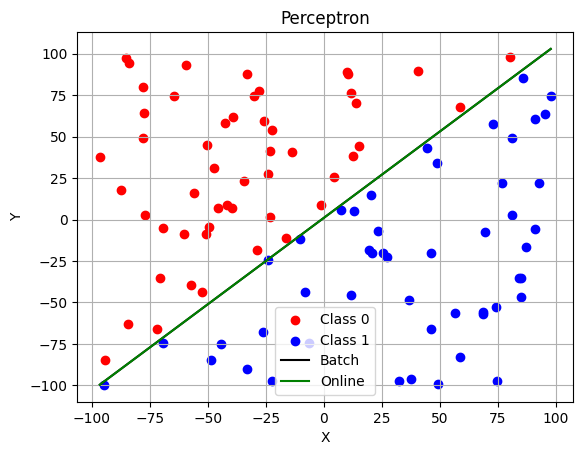

Batch Perceptron Final Weights: [4.500674013413048, 2099.842256184691, -2094.340845572173]
Nombre d'itération batch:  11
Online Perceptron Final Weights: [5.900674013413046, 176.27031083640813, -175.8516987419897]


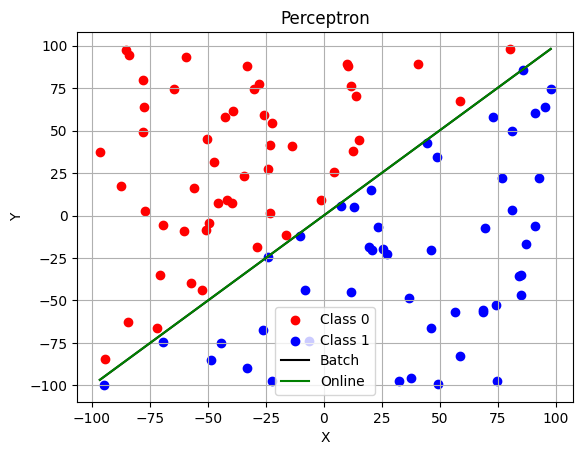

Nombre d'itérations online:  7
Rapport Batch:  0.8260897938128023
Rapport online:  0.8383761186864087


In [14]:

N = 100
dim = 2
weights_teacher = np.random.randn(dim + 1)


points_T, labels_T = generate_ls_data(N, dim, weights_teacher)
print("visualisation des points LS")
plot_perceptron(points_T, labels_T, weights_teacher,weights_teacher)



initial_weights_student = np.random.randn(dim + 1)


alpha = 0.7


final_weights_batch,ite_batch = perceptron_batch(points_T, labels_T, initial_weights_student, alpha)
print("Batch Perceptron Final Weights:", final_weights_batch)
print("Nombre d'itération batch: ",ite_batch)


final_weights_online, ite_online = perceptron_online(points_T, labels_T, initial_weights_student, alpha)
print("Online Perceptron Final Weights:", final_weights_online)
plot_perceptron(points_T, labels_T, final_weights_batch,final_weights_online)
print("Nombre d'itérations online: ",ite_online)

def calculer_R(weights_teacher, weights_student):
    
    weights_teacher = np.array(weights_teacher)
    weights_student = np.array(weights_student)
    
    
    dot_product = np.dot(weights_teacher, weights_student)
    
    
    norm_teacher = np.linalg.norm(weights_teacher)
    norm_student = np.linalg.norm(weights_student)
    
    
    cosine_angle = dot_product / (norm_teacher * norm_student)
    
    return cosine_angle


overlap_batch = calculer_R(weights_teacher, final_weights_batch)
overlap_online = calculer_R(weights_teacher, final_weights_online)

print("Rapport Batch: ",overlap_batch)
print("Rapport online: ",overlap_online)


 - ## Section 5 : Tests avec différents ensembles de données

Réalisation de tests avec différentes dimensions, nombres de points, et valeurs de taux d'apprentissage (`eta`).


In [16]:
# Dimensions et nombres de points à tester
N_values = [2, 10, 100, 500, 1000, 5000]
P_values = [10, 100, 500, 1000]
eta_values = [0.45, 0.45/2, 0.45/10]


# tests pour la version batch
results_batch = run_tests(N_values, P_values, eta_values, perceptron_batch)

# tests pour la version online
results_online = run_tests(N_values, P_values, eta_values, perceptron_online)

format_results(N_values, P_values, eta_values, results_batch, results_online)


Running tests for N=2, P=10, and eta=0.45...
Running tests for N=2, P=10, and eta=0.225...
Running tests for N=2, P=10, and eta=0.045...
Running tests for N=2, P=100, and eta=0.45...
Running tests for N=2, P=100, and eta=0.225...
Running tests for N=2, P=100, and eta=0.045...
Running tests for N=2, P=500, and eta=0.45...
Running tests for N=2, P=500, and eta=0.225...
Running tests for N=2, P=500, and eta=0.045...
Running tests for N=10, P=10, and eta=0.45...
Running tests for N=10, P=10, and eta=0.225...
Running tests for N=10, P=10, and eta=0.045...
Running tests for N=10, P=100, and eta=0.45...
Running tests for N=10, P=100, and eta=0.225...
Running tests for N=10, P=100, and eta=0.045...
Running tests for N=10, P=500, and eta=0.45...
Running tests for N=10, P=500, and eta=0.225...
Running tests for N=10, P=500, and eta=0.045...
Running tests for N=100, P=10, and eta=0.45...
Running tests for N=100, P=10, and eta=0.225...
Running tests for N=100, P=10, and eta=0.045...
Running tests 

- ## Section 6 : Visualisation des résultats

Présentation des résultats obtenus pour les différentes tests 


Pour eta=0.7:
| N\P  | 10           | 100          | 500          | 1000         |
|------|--------------|--------------|--------------|--------------|
| 2    | <7.62;0.73>  | <186.64;0.83>| <2361.50;0.96>| <7373.84;0.97>|
| 2    | <5.50;0.74>  | <69.74;0.84> | <263.28;0.93>| <342.76;0.98> |
| 10   | <3.96;0.63>  | <12.32;0.94> | <33.76;0.95> | <60.52;0.96> |
| 10   | <3.02;0.59>  | <23.16;0.95> | <193.52;0.96>| <502.90;0.98> |
| 100  | <3.26;0.23>  | <7.02;0.65>  | <16.92;0.95> | <24.26;0.98>  |
| 100  | <3.02;0.21>  | <6.98;0.64>  | <37.94;0.95> | <107.08;0.98> |
| 500  | <3.32;0.11>  | <4.54;0.32>  | <10.50;0.65> | <16.12;0.81>  |
| 500  | <2.90;0.09>  | <4.90;0.30>  | <11.74;0.65> | <23.40;0.83>  |
| 1000 | <3.40;0.07>  | <4.66;0.23>  | <7.92;0.49>  | <11.78;0.65>  |
| 1000 | <3.06;0.07>  | <4.60;0.21>  | <8.32;0.48>  | <14.20;0.65>  |
| 5000 | <3.36;0.03>  | <4.78;0.10>  | <5.90;0.23>  | <6.98;0.32>   |
| 5000 | <3.00;0.03>  | <4.74;0.09>  | <6.40;0.21>  | <8.26;0.30>   |



Pour eta=0.35:
| N\P  | 10           | 100          | 500          | 1000         |
|------|--------------|--------------|--------------|--------------|
| 2    | <5.98;0.78>  | <257.92;0.84>| <2326.24;0.96>| <6142.82;0.97>|
| 2    | <3.82;0.72>  | <99.56;0.86> | <258.04;0.94>| <346.34;0.97> |
| 10   | <3.84;0.63>  | <13.28;0.93> | <57.18;0.95> | <229.66;0.97> |
| 10   | <2.90;0.62>  | <27.38;0.95> | <224.44;0.96>| <498.94;0.97> |
| 100  | <3.46;0.22>  | <7.06;0.65>  | <18.34;0.95> | <26.04;0.98>  |
| 100  | <2.94;0.21>  | <7.18;0.65>  | <38.00;0.95> | <104.52;0.98> |
| 500  | <3.36;0.09>  | <4.76;0.32>  | <10.32;0.65> | <15.84;0.81>  |
| 500  | <2.98;0.10>  | <4.64;0.30>  | <11.74;0.65> | <22.42;0.82>  |
| 1000 | <3.28;0.07>  | <4.78;0.23>  | <8.30;0.49>  | <11.84;0.65>  |
| 1000 | <2.90;0.06>  | <4.68;0.21>  | <8.22;0.48>  | <14.28;0.65>  |
| 5000 | <3.36;0.03>  | <4.78;0.10>  | <5.92;0.23>  | <6.54;0.32>   |
| 5000 | <3.12;0.03>  | <4.92;0.09>  | <6.58;0.22>  | <8.28;0.30>   |



Pour eta=0.06999999999999999:
| N\P  | 10           | 100          | 500          | 1000         |
|------|--------------|--------------|--------------|--------------|
| 2    | <3.46;0.77>  | <153.88;0.81>| <2574.90;0.92>| <7056.14;0.98>|
| 2    | <2.94;0.70>  | <90.24;0.84> | <328.90;0.95>| <321.30;0.98> |
| 10   | <4.00;0.65>  | <12.04;0.95> | <22.96;0.94> | <249.18;0.95> |
| 10   | <3.40;0.61>  | <24.58;0.95> | <215.02;0.96>| <496.10;0.98> |
| 100  | <3.38;0.23>  | <6.74;0.64>  | <17.46;0.94> | <24.36;0.98>  |
| 100  | <2.88;0.20>  | <7.24;0.64>  | <38.00;0.95> | <114.20;0.98> |
| 500  | <3.50;0.10>  | <4.90;0.32>  | <10.40;0.65> | <15.54;0.81>  |
| 500  | <2.94;0.09>  | <4.76;0.31>  | <11.80;0.65> | <22.88;0.82>  |
| 1000 | <3.18;0.07>  | <4.60;0.22>  | <7.66;0.49>  | <11.92;0.65>  |
| 1000 | <2.84;0.07>  | <4.88;0.22>  | <9.16;0.47>  | <14.56;0.65>  |
| 5000 | <3.28;0.03>  | <4.96;0.10>  | <6.00;0.23>  | <6.66;0.32>   |
| 5000 | <2.88;0.03>  | <4.56;0.09>  | <6.64;0.22>  | <7.74;0.30>   |
